In [11]:
import pickle

Now upload files manually via sidebar

## digits, 0.03nt, 0.002et

In [12]:
with open("/content/digits_adjList.pkl", "rb") as f:
  digits_adjList = pickle.load(f)

In [13]:
# Filter out nodes in source adj list which aren't in original circuit
all_keys = set(digits_adjList.keys())
# Iterate through the dictionary and filter the list values
for key, value in digits_adjList.items():
    digits_adjList[key] = [item for item in value if item in all_keys]

In [14]:
# Filter out nodes that don't have outgoing edges except for (9,1) and (10, 7)
digits_adjList = {node: neighbors for node, neighbors in digits_adjList.items() if neighbors or node == (9,1) or node == (10,7)}

## numwords, 0.03nt, 0.005et

In [15]:
with open("/content/numwords_adjList.pkl", "rb") as f:
  numwords_adjList = pickle.load(f)

In [16]:
# Filter out nodes in source adj list which aren't in original circuit
all_keys = set(numwords_adjList.keys())
# Iterate through the dictionary and filter the list values
for key, value in numwords_adjList.items():
    numwords_adjList[key] = [item for item in value if item in all_keys]

In [17]:
# Filter out nodes that don't have outgoing edges except for (9,1) and (10, 7)
numwords_adjList = {node: neighbors for node, neighbors in numwords_adjList.items() if neighbors or node == (9,1) or node == (10,7)}

## decr digits, 0.98nt, 0.005et

In [18]:
import pickle

with open("/content/decrDig_adjList.pkl", "rb") as f:
  decrDig_adjList = pickle.load(f)

In [19]:
# all_keys = set(head_adjList.keys())
# # Iterate through the dictionary and filter the list values
# for key, value in head_adjList.items():
#     head_adjList[key] = [item for item in value if item in all_keys]

In [20]:
# Filter out nodes that don't have outgoing edges except for (9,1) and (10, 7)
# head_adjList = {node: neighbors for node, neighbors in head_adjList.items() if neighbors or node == (9,1) or node == (10,7)}

# Plot

In [21]:
set1 = {1, 2, 3, 4, 5}
set2 = {3, 4, 5, 6, 7}
set3 = {5, 6, 7, 8, 9}

# Combine the three sets into set X
setX = set1.union(set2, set3)

# Create a dictionary to store the colors
color_dict = {}

# Check each member in set X and assign colors
for member in setX:
    in_set1 = member in set1
    in_set2 = member in set2
    in_set3 = member in set3

    if in_set1 and not in_set2 and not in_set3:
        color_dict[member] = "red"
    elif not in_set1 and in_set2 and not in_set3:
        color_dict[member] = "blue"
    elif not in_set1 and not in_set2 and in_set3:
        color_dict[member] = "yellow"
    elif in_set1 and in_set2 and not in_set3:
        color_dict[member] = "purple"
    elif not in_set1 and in_set2 and in_set3:
        color_dict[member] = "green"
    elif in_set1 and not in_set2 and in_set3:
        color_dict[member] = "orange"
    elif in_set1 and in_set2 and in_set3:
        color_dict[member] = "white"

for member, color in color_dict.items():
    print(f"Member {member} is in {color} set.")

Member 1 is in red set.
Member 2 is in red set.
Member 3 is in purple set.
Member 4 is in purple set.
Member 5 is in white set.
Member 6 is in green set.
Member 7 is in green set.
Member 8 is in yellow set.
Member 9 is in yellow set.


In [31]:
from graphviz import Digraph, Source
from IPython.display import display
from google.colab import files

def plot_graph_adjacency(head_adjList_1, head_adjList_2, head_adjList_3, filename="circuit_graph", highlighted_nodes=None):
    dot = Digraph()

    if highlighted_nodes is None:
        highlighted_nodes = []

    # concat all keys from lists into one list
    # all_keys = list(head_adjList_1.keys()) + list(head_adjList_2.keys()) + list(head_adjList_3.keys())

    color_dict = {}

    # determine set overlap
    # setX = all_keys
    set1 = set(list(head_adjList_1.keys()))
    set2 = set(list(head_adjList_2.keys()))
    set3 = set(list(head_adjList_3.keys()))
    setX = set1.union(set2, set3)

    for member in setX:
        in_set1 = member in set1
        in_set2 = member in set2
        in_set3 = member in set3

        if in_set1 and not in_set2 and not in_set3:
            color_dict[member] = "red"
        elif not in_set1 and in_set2 and not in_set3:
            color_dict[member] = "blue"
        elif not in_set1 and not in_set2 and in_set3:
            color_dict[member] = "yellow"
        elif in_set1 and in_set2 and not in_set3:
            color_dict[member] = "purple"
        elif not in_set1 and in_set2 and in_set3:
            color_dict[member] = "green"
        elif in_set1 and not in_set2 and in_set3:
            color_dict[member] = "orange"
        elif in_set1 and in_set2 and in_set3:
            color_dict[member] = "white"

    # for member, color in color_dict.items():
    #     print(f"Member {member} is in {color} set.")

#     # Helper function to get node color
#     def get_node_color(node):
#         return "#E6E6FA" if node in highlighted_nodes else "white"

    for end_node, start_nodes_list in head_adjList_1.items():
        # Ensure end_node is present as a node in the graph with potential color
        endNodeColor = color_dict[end_node]
        if endNodeColor != 'white':
            dot.node(str(end_node), color=endNodeColor, style='filled')
        else:
            dot.node(str(end_node))

        for start in start_nodes_list:
            startNodeColor = color_dict[end_node]
            if startNodeColor != 'white':
                dot.node(str(start), color=startNodeColor, style='filled')
            else:
                dot.node(str(start))

            dot.edge(str(start), str(end_node))
            # add edge by color
            # if startNodeColor != "white" and endNodeColor != "white":
            #     dot.edge(str(start), str(end_node), color = 'purple')
            # else:
            #     dot.edge(str(start), str(end_node))

#     for end_node, start_nodes_list in head_adjList.items():
#         # Ensure end_node is present as a node in the graph with potential color
#         endNodeColor = get_node_color(end_node)
#         if endNodeColor == "#E6E6FA":
#             dot.node(str(end_node), color=endNodeColor, style='filled')
#         else:
#             dot.node(str(end_node))

#         for start in start_nodes_list:
#             startNodeColor = get_node_color(start)
#             if startNodeColor == "#E6E6FA":
#                 dot.node(str(start), color=startNodeColor, style='filled')
#             else:
#                 dot.node(str(start))
#             if startNodeColor == "#E6E6FA" and endNodeColor == "#E6E6FA":
#                 dot.edge(str(start), str(end_node), color = 'purple')
#             else:
#                 dot.edge(str(start), str(end_node))

    # Display the graph in Colab
    display(Source(dot.source))

#     # Save the graph to a file
#     dot.format = 'pdf'  # You can change this to 'pdf', 'svg', etc. based on your needs
#     dot.render(filename)
#     files.download(filename + ".pdf")

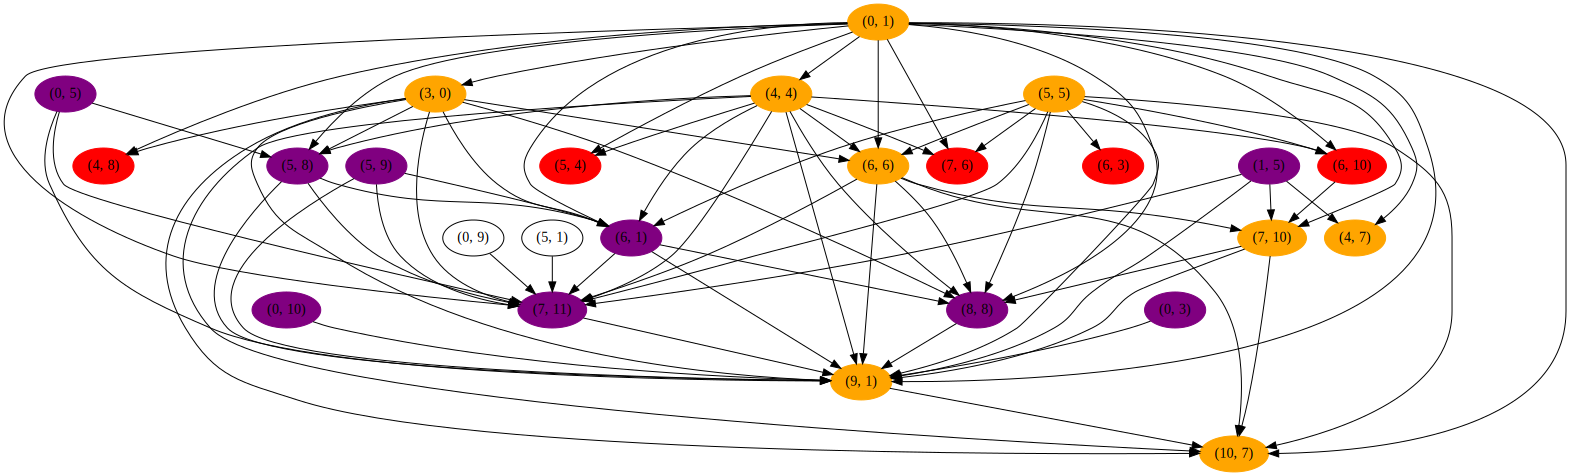

In [32]:
plot_graph_adjacency(digits_adjList, numwords_adjList, decrDig_adjList, filename="circuit_graph")

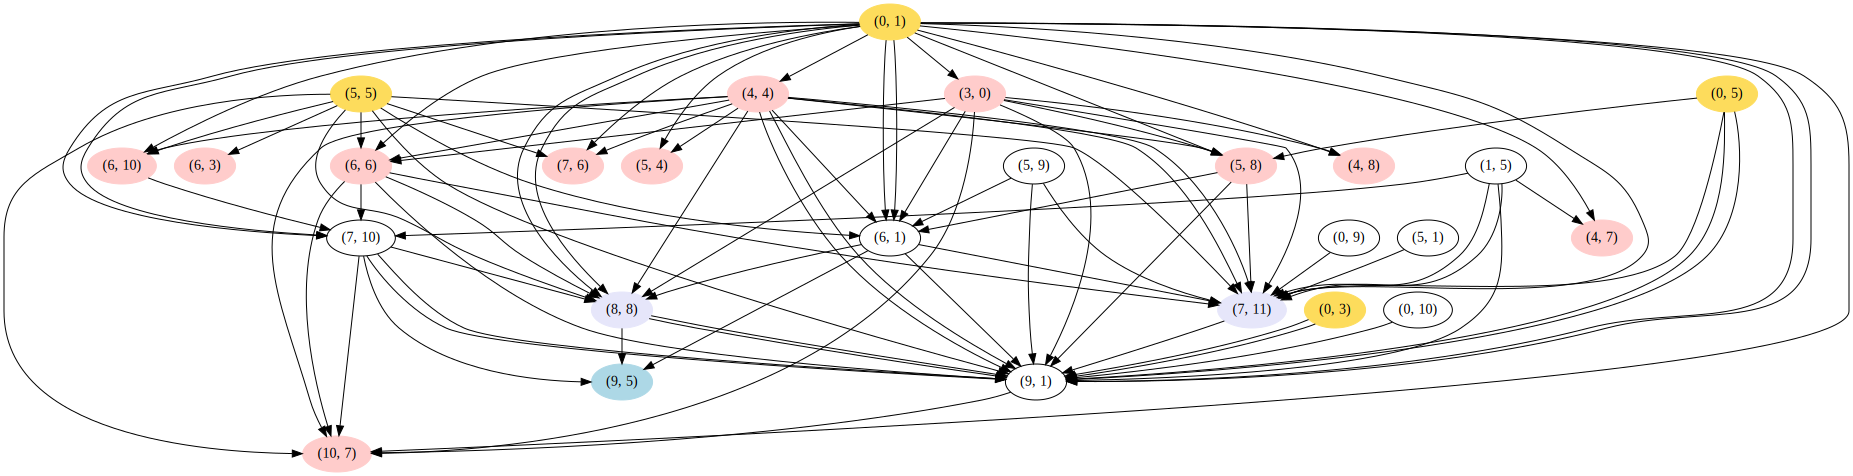

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [85]:
from graphviz import Digraph, Source
from IPython.display import display
from google.colab import files

def plot_graph_adjacency(head_adjList_1, head_adjList_2, head_adjList_3, filename="circuit_graph", highlighted_nodes=None):
    dot = Digraph()

    if highlighted_nodes is None:
        highlighted_nodes = []

    # concat all keys from lists into one list
    # all_keys = list(head_adjList_1.keys()) + list(head_adjList_2.keys()) + list(head_adjList_3.keys())

    color_dict = {}

    # greater_than = [(0, 1), (0, 3), (0, 5), (5, 5), (6, 1), (6, 9), (7, 10), (8, 11), (9,1)]
    greater_than = [(0, 1), (0, 3), (0, 5), (5, 5), (6, 1), (7, 10), (9,1)]

    # determine set overlap
    # setX = all_keys
    set1 = set(list(head_adjList_1.keys()))
    set2 = set(list(head_adjList_2.keys()))
    # set3 = set(list(head_adjList_3.keys()))
    set3 = set(greater_than)
    setX = set1.union(set2, set3)

    for member in setX:
        in_set1 = member in set1
        in_set2 = member in set2
        in_set3 = member in set3

        if in_set1 and not in_set2 and not in_set3:
            color_dict[member] = "#ffcccb" #light red
        elif not in_set1 and in_set2 and not in_set3:
            color_dict[member] = "#ADD8E6" #light blue
        elif not in_set1 and not in_set2 and in_set3:
            color_dict[member] = "#FDDC5C" #light gold
        elif in_set1 and in_set2 and not in_set3:
            color_dict[member] = "#E6E6FA" #light purple
        elif not in_set1 and in_set2 and in_set3:
            color_dict[member] = "#90EE90" #light green
        elif in_set1 and not in_set2 and in_set3:
            color_dict[member] = "#FFD580" #light orange
        elif in_set1 and in_set2 and in_set3:
            color_dict[member] = "white"

    # for member, color in color_dict.items():
    #     print(f"Member {member} is in {color} set.")

    for end_node in setX:
        endNodeColor = color_dict[end_node]
        if endNodeColor != 'white':
            dot.node(str(end_node), color=endNodeColor, style='filled')
        else:
            dot.node(str(end_node))

    for end_node, start_nodes_list in head_adjList_1.items():
        for start in start_nodes_list:
            dot.edge(str(start), str(end_node))
    for end_node, start_nodes_list in head_adjList_2.items():
        for start in start_nodes_list:
            dot.edge(str(start), str(end_node))
    # for end_node, start_nodes_list in head_adjList_3.items():
    #     for start in start_nodes_list:
    #         dot.edge(str(start), str(end_node))

    # Display the graph in Colab
    display(Source(dot.source))

    # Save the graph to a file
    # dot.format = 'pdf'  # You can change this to 'pdf', 'svg', etc. based on your needs
    dot.format = 'png'  # You can change this to 'pdf', 'svg', etc. based on your needs
    dot.render(filename)
    # files.download(filename + ".pdf")
    files.download(filename + ".png")

plot_graph_adjacency(digits_adjList, numwords_adjList, decrDig_adjList, filename="circuit_graph")

In [73]:
from graphviz import Digraph, Source
from IPython.display import display
from google.colab import files

def plot_graph_adjacency(head_adjList_1, head_adjList_2, head_adjList_3, filename="circuit_graph", highlighted_nodes=None):
    dot = Digraph()

    if highlighted_nodes is None:
        highlighted_nodes = []

    # concat all keys from lists into one list
    # all_keys = list(head_adjList_1.keys()) + list(head_adjList_2.keys()) + list(head_adjList_3.keys())

    color_dict = {}

    # greater_than = [(0, 1), (0, 3), (0, 5), (5, 5), (6, 1), (6, 9), (7, 10), (8, 11), (9,1)]
    greater_than = [(0, 1), (0, 3), (0, 5), (5, 5), (6, 1), (7, 10), (9,1)]

    # determine set overlap
    # setX = all_keys
    set1 = set(list(head_adjList_1.keys()))
    set2 = set(list(head_adjList_2.keys()))
    # set3 = set(list(head_adjList_3.keys()))
    set3 = set(greater_than)
    setX = set1.union(set2, set3)

    for member in setX:
        in_set1 = member in set1
        in_set2 = member in set2
        in_set3 = member in set3

        if in_set1 and not in_set2 and not in_set3:
            color_dict[member] = "#ffcccb" #light red
        elif not in_set1 and in_set2 and not in_set3:
            color_dict[member] = "#ADD8E6" #light blue
        elif not in_set1 and not in_set2 and in_set3:
            color_dict[member] = "#FDDC5C" #light gold
        elif in_set1 and in_set2 and not in_set3:
            color_dict[member] = "#E6E6FA" #light purple
        elif not in_set1 and in_set2 and in_set3:
            color_dict[member] = "#90EE90" #light green
        elif in_set1 and not in_set2 and in_set3:
            color_dict[member] = "#FFD580" #light orange
        elif in_set1 and in_set2 and in_set3:
            color_dict[member] = "white"

    # for member, color in color_dict.items():
    #     print(f"Member {member} is in {color} set.")

    for end_node in setX:
        endNodeColor = color_dict[end_node]
        if endNodeColor != 'white':
            dot.node(str(end_node), color=endNodeColor, style='filled')
        else:
            dot.node(str(end_node))

    for end_node, start_nodes_list in head_adjList_1.items():
        for start in start_nodes_list:
            dot.edge(str(start), str(end_node))
    for end_node, start_nodes_list in head_adjList_2.items():
        for start in start_nodes_list:
            dot.edge(str(start), str(end_node))
    # for end_node, start_nodes_list in head_adjList_3.items():
    #     for start in start_nodes_list:
    #         dot.edge(str(start), str(end_node))

    with dot.subgraph(name='cluster_legend') as legend:
        legend.attr(color="black", label="Legend")

        legend.node('A', label='Incr Digits Only', color="#ffcccb", style='filled', fontcolor="white")
        legend.node('B', label='Num Words Only', color="#ADD8E6", style='filled', fontcolor="white")
        legend.node('C', label='green nodes', color="#FDDC5C", style='filled', fontcolor="white")
        # legend.edges([])  # This ensures no edges are created between legend nodes


    # Display the graph in Colab
    display(Source(dot.source))

    # Save the graph to a file
    # dot.format = 'pdf'  # You can change this to 'pdf', 'svg', etc. based on your needs
    # dot.render(filename)
    # files.download(filename + ".pdf")

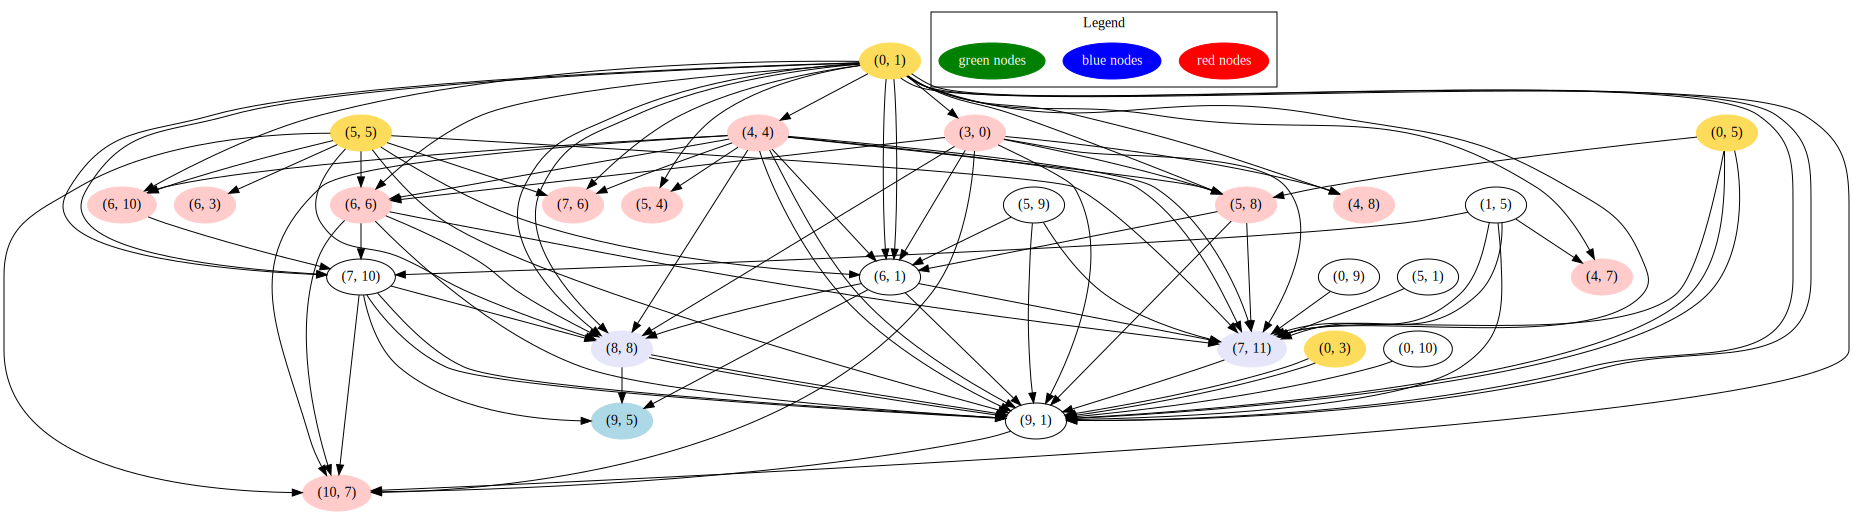

In [74]:
plot_graph_adjacency(digits_adjList, numwords_adjList, decrDig_adjList, filename="circuit_graph")

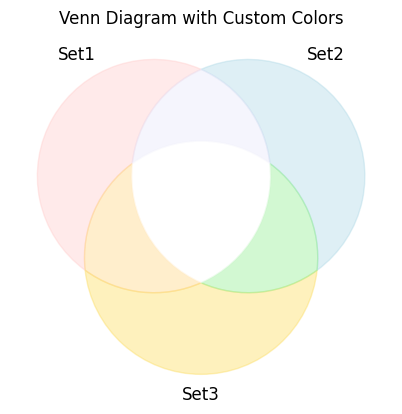

In [80]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# Create the Venn diagram with custom colors
venn = venn3(subsets=(1, 1, 1, 1, 1, 1, 1), set_labels=('Increasing Digits', 'Number Words', 'Set3'))

# Assigning colors based on the conditions given
venn.get_label_by_id('100').set_text('')  # in_set1 only
venn.get_patch_by_id('100').set_color("#ffcccb")  # light red

venn.get_label_by_id('010').set_text('')  # in_set2 only
venn.get_patch_by_id('010').set_color("#ADD8E6")  # light blue

venn.get_label_by_id('001').set_text('')  # in_set3 only
venn.get_patch_by_id('001').set_color("#FDDC5C")  # light gold

venn.get_label_by_id('110').set_text('')  # in_set1 and in_set2
venn.get_patch_by_id('110').set_color("#E6E6FA")  # light purple

venn.get_label_by_id('011').set_text('')  # in_set2 and in_set3
venn.get_patch_by_id('011').set_color("#90EE90")  # light green

venn.get_label_by_id('101').set_text('')  # in_set1 and in_set3
venn.get_patch_by_id('101').set_color("#FFD580")  # light orange

venn.get_label_by_id('111').set_text('')  # in all three sets
venn.get_patch_by_id('111').set_color("white")

# Display the diagram with custom colors
plt.title("Node Color ")
plt.show()


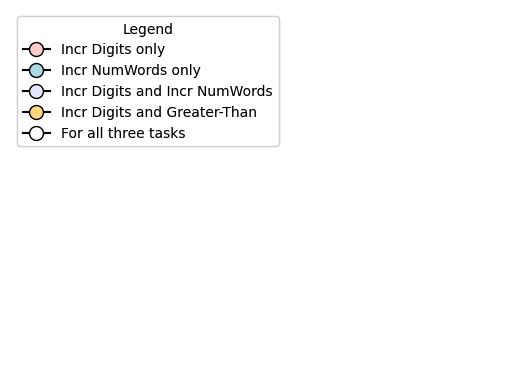

In [87]:
import matplotlib.pyplot as plt

# Define the colors and the corresponding labels
# colors = ["#ffcccb", "#ADD8E6", "#FDDC5C", "#E6E6FA", "#90EE90", "#FFD580", "white"]
# colors = ["#ffcccb", "#ADD8E6", "#E6E6FA", "#90EE90", "#FFD580", "white"]
colors = ["#ffcccb", "#ADD8E6", "#E6E6FA", "#FFD580", "white"]
labels = [
    "Incr Digits only",
    "Incr NumWords only",
    # "Greater-Than only",
    "Incr Digits and Incr NumWords",
    # "Incr NumWords and Greater-Than",
    "Incr Digits and Greater-Than",
    "For all three tasks"
]

# Create a figure and axis
fig, ax = plt.subplots()

# Create a list of patches for the legend
patches = [plt.Line2D([0], [0], marker='o', color='black', markerfacecolor=color, markersize=10) for color in colors]

# Create the legend
legend = ax.legend(patches, labels, loc='upper left', title="Legend", frameon=True)

# Add the legend to the axis
ax.add_artist(legend)

# Hide the axis
ax.axis('off')

# Display the legend
plt.show()


In [88]:
!pip install PyPDF2 Pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.4 MB/s eta 0:00:00


In [106]:
import PyPDF2
from PyPDF2 import Transformation
from PIL import Image

def add_image_to_pdf(pdf_path, image_path, output_path, x=0, y=0, page_num=0):
    """
    Add an image to a specific location on a PDF.

    Parameters:
    - pdf_path: path to the source PDF file.
    - image_path: path to the image file to be added to the PDF.
    - output_path: path to save the new PDF.
    - x, y: coordinates to place the image on the PDF.
    - page_num: page number to add the image to.
    """
    # Open the source PDF file
    pdf = PyPDF2.PdfReader(pdf_path)
    pdf_writer = PyPDF2.PdfWriter()

    # Open the image file with Pillow
    image = Image.open(image_path)

    if image.mode == "RGBA":
        image = image.convert("RGB")

    # Convert the image to a PDF
    image_pdf = Image.Image.save(image, "temp_image.pdf", "PDF", resolution=100.0)

    # Open the converted image PDF
    image_pdf = PyPDF2.PdfReader("temp_image.pdf")

    # Get the width of the PDF page and the image PDF
    pdf_page_width = pdf.pages[page_num].mediabox[2]
    image_pdf_width = image_pdf.pages[0].mediabox[2]

    # Calculate the x-coordinate to place the image on the right
    x = pdf_page_width - image_pdf_width

    # Iterate over the pages in the source PDF
    for i in range(len(pdf.pages)):
        page = pdf.pages[i]

        # # If this is the page to add the image to, merge the image PDF with it
        # if i == page_num:
        #     page.merge_page(image_pdf.pages[0])

        # If this is the page to add the image to, merge the image PDF with it at the calculated x-coordinate
        if i == page_num:
            # page.mergeTranslatedPage(image_pdf.pages[0], x, y)
            image_pdf.pages[0].add_transformation(Transformation().translate(x, y)); page.merge_page(image_pdf.pages[0], expand)


        pdf_writer.add_page(page)

    # Save the new PDF
    with open(output_path, 'wb') as f:
        pdf_writer.write(f)


add_image_to_pdf('/content/overall_circuit_graph.pdf', '/content/legend_of_overall.PNG', 'output.pdf', x=50, y=50, page_num=0)

NameError: ignored

In [98]:
from google.colab import files
files.download('output.pdf')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Try ordering by node layer

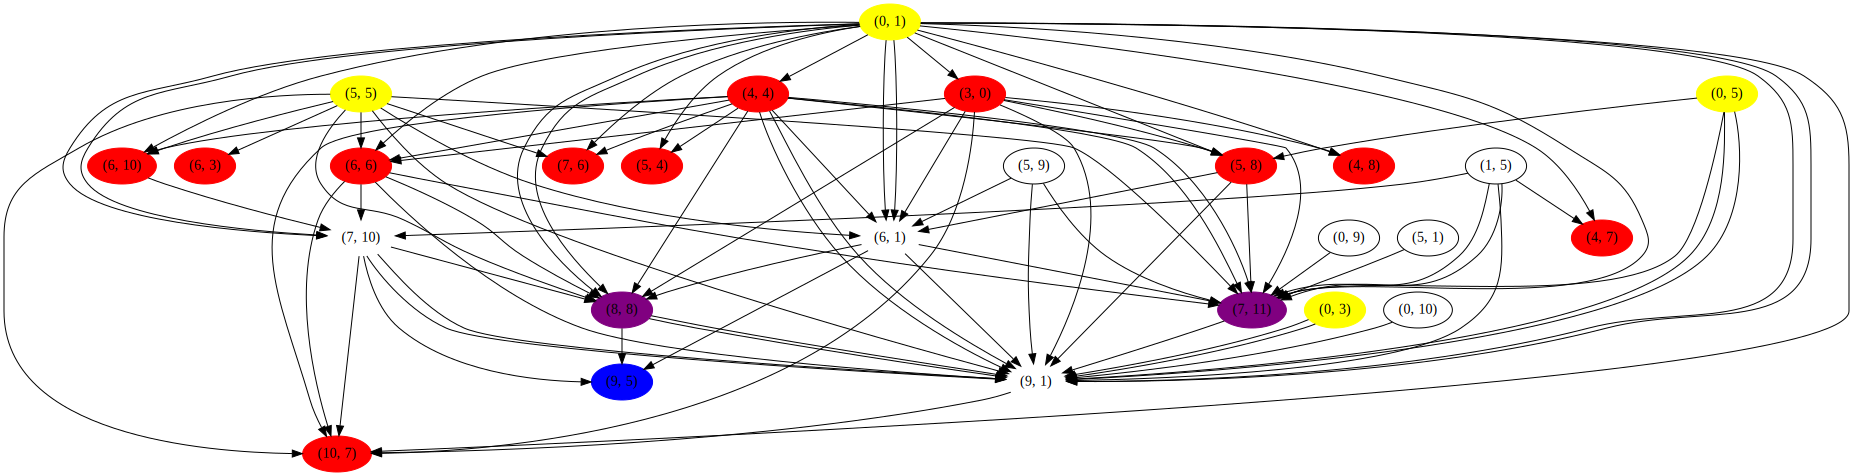

In [44]:
from graphviz import Digraph, Source
from IPython.display import display

def plot_graph_adjacency(head_adjList_1, head_adjList_2, head_adjList_3, filename="circuit_graph", highlighted_nodes=None):
    dot = Digraph()

    greater_than = [(0, 1), (0, 3), (0, 5), (5, 5), (6, 1), (7, 10), (9, 1)]

    # Determine set overlap
    set1 = set(list(head_adjList_1.keys()))
    set2 = set(list(head_adjList_2.keys()))
    set3 = set(greater_than)
    setX = set1.union(set2, set3)

    # Sort the nodes based on their first element
    setX_list = sorted(list(setX))

    # Create a dictionary to store the layer for each node
    node_layers = {}
    current_layer = 0

    for node in setX_list:
        if node[0] not in node_layers:
            node_layers[node[0]] = current_layer
            current_layer += 1

        # if node[1] not in node_layers:
        #     node_layers[node[1]] = current_layer
        #     current_layer += 1

    for member in setX:
        in_set1 = member in set1
        in_set2 = member in set2
        in_set3 = member in set3

        if in_set1 and not in_set2 and not in_set3:
            color_dict[member] = "red"
        elif not in_set1 and in_set2 and not in_set3:
            color_dict[member] = "blue"
        elif not in_set1 and not in_set2 and in_set3:
            color_dict[member] = "yellow"
        elif in_set1 and in_set2 and not in_set3:
            color_dict[member] = "purple"
        elif not in_set1 and in_set2 and in_set3:
            color_dict[member] = "green"
        elif in_set1 and not in_set2 and in_set3:
            color_dict[member] = "orange"
        elif in_set1 and in_set2 and in_set3:
            color_dict[member] = "white"

    for end_node in setX:
        endNodeColor = color_dict[end_node]
        layer = node_layers[end_node[0]]
        dot.node(str(end_node), color=endNodeColor, style='filled', rank=str(layer))

    for end_node, start_nodes_list in head_adjList_1.items():
        for start in start_nodes_list:
            dot.edge(str(start), str(end_node))
    for end_node, start_nodes_list in head_adjList_2.items():
        for start in start_nodes_list:
            dot.edge(str(start), str(end_node))

    display(Source(dot.source))

plot_graph_adjacency(digits_adjList, numwords_adjList, decrDig_adjList, filename="circuit_graph")